# GEODOS data processing

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import glob
%pylab inline --no-import-all

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Read Logfile

In [2]:
dto = '/storage/experiments/2021/03_REFLECT3/AirdosCvetsiNaITl_9c' #  Directory to Open
dto = '/storage/experiments/2021/0609_bourka_sobeslav/GEODOS/BF'
#dto = '/storage/experiments/2021/0605_bourka_radosovice/GEODOS/BF'
dto = '/storage/experiments/2021/0803_bourka_votice/geodos'
dto = '/storage/stations/Polednik/geodos/2021/10/10'
#dto = '/storage/stations/Polednik/geodos/2021/10/13'
#dto = '/storage/stations/Polednik/geodos/2021/10/EC'
dto = '/storage/stations/Polednik/geodos/2021/08/10/210812'
dto = '/storage/stations/Polednik/geodos/2021/08/13/210720'
dto = '/storage/experiments/2022/0714_bourka_horovice_CAR1/geodos'
dto = '/storage/stations/Polednik/geodos/2022/07/chlum'
dto = '/storage/stations/Polednik/geodos/2022/06/EC_vez'
dto = '/storage/stations/Kosetice/GEODOS'
#fto = dto + '/DATALOG.TXT'
fto = dto + '/0.TXT'

fto = '/storage/stations/Kosetice/GEODOS/2023/09/dolni_208/9.TXT'
fto = '/storage/stations/Kosetice/GEODOS/2023/09/horni_230/3.TXT'


l=[]
l.extend(range(0,300))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*',engine='python' )

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)

sn = df.loc[df[0]=='$AIRDOS',3]
fw = df.loc[df[0]=='$AIRDOS',2]
last = df.loc[df[0]=='$AIRDOS'].index
print ('s.n.: ',sn[0])
print ('f.v.: ',fw[0])
print(df.loc[df[0]=='$AIRDOS',1])
print(len(df))
print(last[-1:][0])

# keep only last run
#df.drop(df.index[:last[-1:][0]], inplace=True) 

s.n.:  1290c00806a200921812a000a0000045
f.v.:  NaI(Tl)-D18x30
0         GEO_1024_v4
106212    GEO_1024_v4
212424    GEO_1024_v4
318637    GEO_1024_v4
Name: 1, dtype: object
424723
318637


## Fill position and time

In [14]:
break

#df.drop(df.loc[(df[0]=='$GPRMC') & (df[2]=='V')].index, inplace=True)
df['latf'] = pd.to_numeric(df.loc[df[0]=='$GPRMC',3])
df['lonf'] = pd.to_numeric(df.loc[df[0]=='$GPRMC',5])
df['on_miliseconds'] = pd.to_numeric(df.loc[df[0]=='$TIME',1]) * 1000
df['miliseconds'] = pd.to_numeric(df.loc[df[0]=='$HIST',2]) * 1000
df['gps_time'] = df.loc[df[0]=='$GPRMC',1]
df['gps_date'] = df.loc[df[0]=='$GPRMC',9]
df['alt'] = df.loc[df[0]=='$GPGGA',9]
df.loc[(df[0]=='$GPRMC') & (df[6]=='E'),'lon_hem']=1
df.loc[(df[0]=='$GPRMC') & (df[6]=='W'),'lon_hem']=-1
df.loc[(df[0]=='$GPRMC') & (df[4]=='N'),'lat_hem']=1
df.loc[(df[0]=='$GPRMC') & (df[4]=='S'),'lat_hem']=-1
df['lat'] = (np.trunc(df['latf']/100) + (((df['latf']/100) - np.trunc(df['latf']/100)) * 100) / 60.0) * df['lat_hem']
df['lon'] = (np.trunc(df['lonf']/100) + ((df['lonf']/100) - np.trunc(df['lonf']/100)) * 100 / 60.0) * df['lon_hem']  
df['date'] = pd.to_datetime(df['gps_date']+df['gps_time'], format='%d%m%y%H%M%S.%f')#,errors='coerce')
df.drop('lon_hem', axis=1, inplace=True)
df.drop('lat_hem', axis=1, inplace=True)
df.drop('latf', axis=1, inplace=True)
df.drop('lonf', axis=1, inplace=True)
df.drop('gps_time', axis=1, inplace=True)
df.drop('gps_date', axis=1, inplace=True)
df['meas'] = df.loc[df[0]=='$HIST',1]
df = df.fillna(method='ffill')
df.drop(df[df[0]=='$GPGGA'].index, inplace=True)
df.drop(df[df[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$AIRDOS'].index, inplace=True)
df.drop(df[df[0]=='$TIME'].index, inplace=True)
df['UTC'] = df['date'] + pd.to_timedelta(df['miliseconds'], unit='ms') - pd.to_timedelta(df['on_miliseconds'], unit='ms')
df.drop('date', axis=1, inplace=True)
#df.drop('miliseconds', axis=1, inplace=True)
#df.drop('on_miliseconds', axis=1, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,297,298,299,alt,lat,lon,meas,UTC,flag,on_miliseconds
2,$HIST,0,22.87,937.94,19.31,2.70,-21,90,0,34216,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT,False,NaN
3,$HITS,47,2731,35,3001,87,3050,111,3809,64,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT,False,NaN
4,$HIST,1,35.68,937.94,19.31,2.70,-24,180,0,34195,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaT,False,NaN
5,$HITS,32,1921,47,3613,34,3779,170,4816,39,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaT,False,NaN
6,$HIST,2,48.47,937.94,19.31,2.70,-25,254,1,34220,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaT,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318641,$HITS,7,1505,539,16660,110,22463,204,43327,797,...,NaN,NaN,NaN,NaN,NaN,NaN,52998,NaT,False,NaN
318642,$HIST,52999,694680.80,944.45,-1.88,2.74,-13,2917,0,34348,...,NaN,NaN,NaN,NaN,NaN,NaN,52999,NaT,False,NaN
318643,$HITS,7,11244,70,15763,30,25020,47,51516,52,...,NaN,NaN,NaN,NaN,NaN,NaN,52999,NaT,False,NaN
318644,$HIST,53000,694704.80,944.47,-1.88,2.74,-14,10,1,34347,...,NaN,NaN,NaN,NaN,NaN,NaN,53000,NaT,False,NaN


## Galileo support

In [3]:
#df.drop(df.loc[(df[0]=='$GNRMC') & (df[2]=='V')].index, inplace=True)
df.loc[(df[0]=='$GNRMC'),'flag']=True
df.loc[(df[0]=='$HIST'),'flag']=False
df.flag = df.flag.fillna(method='ffill')
df['latf'] = pd.to_numeric(df.loc[df[0]=='$GNRMC',3])
df['lonf'] = pd.to_numeric(df.loc[df[0]=='$GNRMC',5])
#df.loc[(df[0]=='$TIME') & (df['flag']),'on_miliseconds'] = pd.to_numeric(df.loc[df[0]=='$TIME',1]) * 1000
#df['on_miliseconds'] = pd.to_numeric(df.loc[df[0]=='$TIME',1]) * 1000
df['on_miliseconds'] = pd.to_numeric(df.loc[(df[0]=='$TIME') & (df['flag']),1]) * 1000
df['miliseconds'] = pd.to_numeric(df.loc[df[0]=='$HIST',2]) * 1000
df['gps_time'] = df.loc[df[0]=='$GNRMC',1]
df['gps_date'] = df.loc[df[0]=='$GNRMC',9]
df['alt'] = df.loc[df[0]=='$GNGGA',9]
df.loc[(df[0]=='$GNRMC') & (df[6]=='E'),'lon_hem']=1
df.loc[(df[0]=='$GNRMC') & (df[6]=='W'),'lon_hem']=-1
df.loc[(df[0]=='$GNRMC') & (df[4]=='N'),'lat_hem']=1
df.loc[(df[0]=='$GNRMC') & (df[4]=='S'),'lat_hem']=-1
df['lat'] = (np.trunc(df['latf']/100) + (((df['latf']/100) - np.trunc(df['latf']/100)) * 100) / 60.0) * df['lat_hem']
df['lon'] = (np.trunc(df['lonf']/100) + ((df['lonf']/100) - np.trunc(df['lonf']/100)) * 100 / 60.0) * df['lon_hem']  
df['date'] = pd.to_datetime(df['gps_date']+df['gps_time'], format='%d%m%y%H%M%S.%f')#,errors='coerce')
df.drop('lon_hem', axis=1, inplace=True)
df.drop('lat_hem', axis=1, inplace=True)
df.drop('latf', axis=1, inplace=True)
df.drop('lonf', axis=1, inplace=True)
df.drop('gps_time', axis=1, inplace=True)
df.drop('gps_date', axis=1, inplace=True)
df['meas'] = df.index
#df['meas'] = df.loc[df[0]=='$HIST',1]
df.loc[df[0]=='$HITS','meas'] = np.nan
df = df.fillna(method='ffill')
df.meas = df.meas.astype(int)
df.drop(df[df[0]=='$GPGGA'].index, inplace=True)
df.drop(df[df[0]=='$GNRMC'].index, inplace=True)
df.drop(df[df[0]=='$AIRDOS'].index, inplace=True)
df.drop(df[df[0]=='$TIME'].index, inplace=True)
df['UTC'] = df['date'] + pd.to_timedelta(df['miliseconds'], unit='ms') - pd.to_timedelta(df['on_miliseconds'], unit='ms')
#df.drop('date', axis=1, inplace=True)
#df.drop('miliseconds', axis=1, inplace=True)
#df.drop('on_miliseconds', axis=1, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,299,flag,on_miliseconds,miliseconds,alt,lat,lon,date,meas,UTC
1,$HIST,0,23.45,921.60,8.19,2.57,-3,22,0,34331,...,NaN,False,NaN,23450.0,NaN,NaN,NaN,NaT,1,NaT
2,$HITS,6,12994,87,49647,41,56092,39,79884,36,...,NaN,False,NaN,23450.0,NaN,NaN,NaN,NaT,1,NaT
3,$HIST,1,35.86,921.70,8.19,2.57,-3,39,1,34348,...,NaN,False,NaN,35860.0,NaN,NaN,NaN,NaT,3,NaT
4,$HITS,8,17164,29,18395,71,18958,91,26105,40,...,NaN,False,NaN,35860.0,NaN,NaN,NaN,NaT,3,NaT
5,$HIST,2,48.28,921.74,8.19,2.57,-1,51,0,34340,...,NaN,False,NaN,48280.0,NaN,NaN,NaN,NaT,5,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424845,$HITS,8,5652,250,19335,58,20617,46,21352,189,...,NaN,False,659126900.0,701668390.0,772.7,49.57246,15.080036,2023-09-07 18:03:41,424844,2023-09-08 05:52:42.490
424846,$HIST,52999,701681.69,936.23,18.19,2.61,60,2600,0,34352,...,NaN,False,659126900.0,701681690.0,772.7,49.57246,15.080036,2023-09-07 18:03:41,424846,2023-09-08 05:52:55.790
424847,$HITS,1,5347,121,18.19,2.61,60,2600,0,34352,...,NaN,False,659126900.0,701681690.0,772.7,49.57246,15.080036,2023-09-07 18:03:41,424846,2023-09-08 05:52:55.790
424848,$HIST,53000,701705.85,936.19,18.19,2.61,61,12,0,34333,...,NaN,False,659126900.0,701705850.0,772.7,49.57246,15.080036,2023-09-07 18:03:41,424848,2023-09-08 05:53:19.950


In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,299,alt,lat,lon,meas,UTC,flag,on_miliseconds,miliseconds,date
2,$HIST,0,22.87,937.94,19.31,2.70,-21,90,0,34216,...,NaN,NaN,NaN,NaN,2,NaT,False,NaN,22870.0,NaT
3,$HITS,47,2731,35,3001,87,3050,111,3809,64,...,NaN,NaN,NaN,NaN,2,NaT,False,NaN,22870.0,NaT
4,$HIST,1,35.68,937.94,19.31,2.70,-24,180,0,34195,...,NaN,NaN,NaN,NaN,4,NaT,False,NaN,35680.0,NaT
5,$HITS,32,1921,47,3613,34,3779,170,4816,39,...,NaN,NaN,NaN,NaN,4,NaT,False,NaN,35680.0,NaT
6,$HIST,2,48.47,937.94,19.31,2.70,-25,254,1,34220,...,NaN,NaN,NaN,NaN,6,NaT,False,NaN,48470.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318641,$HITS,7,1505,539,16660,110,22463,204,43327,797,...,NaN,762.1,49.572439,15.080041,318640,NaT,False,NaN,694667680.0,2023-02-10 03:53:41
318642,$HIST,52999,694680.80,944.45,-1.88,2.74,-13,2917,0,34348,...,NaN,762.1,49.572439,15.080041,318642,NaT,False,NaN,694680800.0,2023-02-10 03:53:41
318643,$HITS,7,11244,70,15763,30,25020,47,51516,52,...,NaN,762.1,49.572439,15.080041,318642,NaT,False,NaN,694680800.0,2023-02-10 03:53:41
318644,$HIST,53000,694704.80,944.47,-1.88,2.74,-14,10,1,34347,...,NaN,762.1,49.572439,15.080041,318644,NaT,False,NaN,694704800.0,2023-02-10 03:53:41


## Add individual events to histogram

In [4]:
df.dropna(subset=['UTC'], inplace=True)
hist = df.loc[df[0]=='$HIST'].iloc[:,:20].copy()
hist.iloc[:,1:] = hist.iloc[:,1:].apply(pd.to_numeric) #,errors='coerce')
#hist[0] = df[0]
hist['alt'] = df['alt'].apply(pd.to_numeric,errors='coerce')
hist['lat'] = df['lat'].apply(pd.to_numeric,errors='coerce')
hist['lon'] = df['lon'].apply(pd.to_numeric,errors='coerce')
hist['meas'] = df['meas'].apply(pd.to_numeric,errors='coerce')
hist['UTC'] = df['UTC']
#hist.iloc[:,18:269] = 0
hist.set_index('meas', inplace=True)

hits = df.loc[df[0]=='$HITS'].copy()
#hits['meas'] = hist.index
hits.iloc[:,1:] = hits.iloc[:,1:].apply(pd.to_numeric)
hits['UTC'] = df['UTC']
hits.set_index('meas', inplace=True)


In [5]:
hits.iloc[:,40:300] = 0
for i in range(len(hits)):
    for j in range(hits.iloc[i,1]):
        hits.iloc[i,int(40+hits.iloc[i,j*2+3])] +=1
#hits.merge(hist)
#hits.drop(hits.iloc[:,18:40], axis=1, inplace=True)
histogram = pd.DataFrame()
histogram = hist.iloc[:,11:18]
histogram = histogram.join(hits.iloc[:,40+11:])
histogram['temperature'] = hist[4]
histogram['pressure'] = hist[3]
histogram['voltage'] = hist[5]
histogram['current'] = hist[6]
histogram = histogram.rename(columns={x:y for x,y in zip(histogram.columns[:258],range(0,258))})
histogram

IndexError: index 929 is out of bounds for axis 0 with size 308

In [9]:
#histogram.iloc[:,:25]
hist

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,alt,lat,lon,UTC
meas,,,,,,,,,,,,,,,,,,,,,
6550,$HIST,3264,41466.59,931.25,27.50,2.7,-29,15,0,1,...,2.0,1.0,0.0,1.0,1.0,0.0,762.7,49.572396,15.080042,2023-08-24 16:46:52.310
6552,$HIST,3265,41479.23,931.26,27.50,2.7,1,34,0,2,...,1.0,1.0,4.0,1.0,1.0,3.0,762.7,49.572396,15.080042,2023-08-24 16:47:04.950
6554,$HIST,3266,41491.88,931.22,27.50,2.7,12,58,0,2,...,2.0,1.0,2.0,0.0,1.0,1.0,762.7,49.572396,15.080042,2023-08-24 16:47:17.600
6556,$HIST,3267,41504.52,931.21,27.50,2.7,16,74,0,2,...,1.0,1.0,0.0,0.0,0.0,1.0,762.7,49.572396,15.080042,2023-08-24 16:47:30.240
6558,$HIST,3268,41517.16,931.27,27.44,2.7,17,91,0,4,...,3.0,0.0,2.0,0.0,0.0,0.0,762.7,49.572396,15.080042,2023-08-24 16:47:42.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260152,$HIST,23684,309023.14,930.40,31.25,2.7,1,307,0,3,...,1.0,2.0,1.0,2.0,0.0,1.0,748.4,49.572459,15.080097,2023-09-12 12:50:24.500
260154,$HIST,23685,309036.21,930.45,31.13,2.7,0,328,0,3,...,1.0,0.0,1.0,0.0,0.0,1.0,748.4,49.572459,15.080097,2023-09-12 12:50:37.570
260156,$HIST,23686,309049.28,930.38,31.13,2.7,0,338,0,4,...,3.0,2.0,0.0,0.0,0.0,0.0,748.4,49.572459,15.080097,2023-09-12 12:50:50.640


/tmp/ipykernel_20007/1027357378.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='grey', linestyle='-')
/tmp/ipykernel_20007/1027357378.py:43: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='grey', linestyle='-')


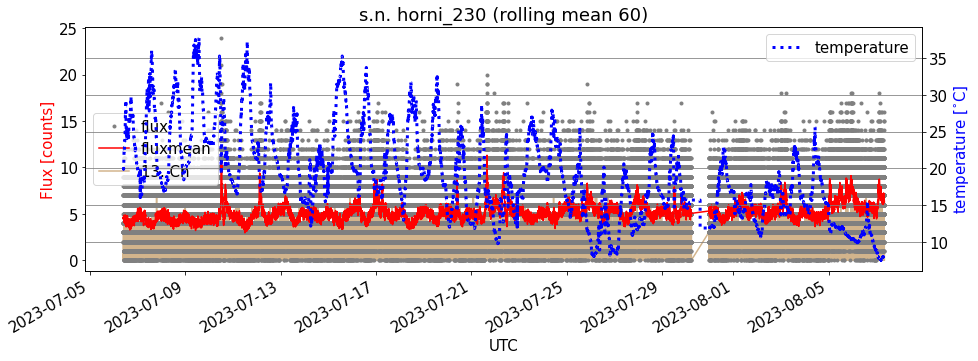

In [46]:
NOISE_LEVEL = 13
LAST_CHANNEL = 20
WINDOW = 60

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})


xx = hist.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-08-15 12:00:00':'2021-08-16 18:00:00'] # bourka s odpalenu dobijeci eletronikou
#xx = xx.loc['2023-08-22 00:00:00':'2023-09-03 23:00:00'] # FD 11. 2021
#xx = xx.loc['2023-08-17 00:00:00':'2023-08-20 23:00:00'] # FD 11. 2021
#xx = xx.loc['2023-07-09 00:00:00':'2023-07-11 23:00:00'] # FD 11. 2021


#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title("s.n. " + s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,1.5])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts]', color='red')
plt.legend(loc=6)

ax = plt.twinx()

#plt.ylim([0,14000])
xx[4].plot(c='blue', label='temperature', linewidth='3', linestyle=':', drawstyle='steps-mid')
plt.ylabel(r'temperature [$^{\circ}$C]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



In [13]:
xx

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,alt,lat,lon,UTC,flux,fluxmean
UTC,,,,,,,,,,,,,,,,,,,,,
2023-08-24 16:46:52.310,$HIST,3264,41466.59,931.25,27.50,2.7,-29,15,0,1,...,0.0,1.0,1.0,0.0,762.7,49.572396,15.080042,2023-08-24 16:46:52.310,7.0,NaN
2023-08-24 16:47:04.950,$HIST,3265,41479.23,931.26,27.50,2.7,1,34,0,2,...,4.0,1.0,1.0,3.0,762.7,49.572396,15.080042,2023-08-24 16:47:04.950,15.0,NaN
2023-08-24 16:47:17.600,$HIST,3266,41491.88,931.22,27.50,2.7,12,58,0,2,...,2.0,0.0,1.0,1.0,762.7,49.572396,15.080042,2023-08-24 16:47:17.600,15.0,NaN
2023-08-24 16:47:30.240,$HIST,3267,41504.52,931.21,27.50,2.7,16,74,0,2,...,0.0,0.0,0.0,1.0,762.7,49.572396,15.080042,2023-08-24 16:47:30.240,8.0,NaN
2023-08-24 16:47:42.880,$HIST,3268,41517.16,931.27,27.44,2.7,17,91,0,4,...,2.0,0.0,0.0,0.0,762.7,49.572396,15.080042,2023-08-24 16:47:42.880,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-12 12:50:24.500,$HIST,23684,309023.14,930.40,31.25,2.7,1,307,0,3,...,1.0,2.0,0.0,1.0,748.4,49.572459,15.080097,2023-09-12 12:50:24.500,20.0,17.066667
2023-09-12 12:50:37.570,$HIST,23685,309036.21,930.45,31.13,2.7,0,328,0,3,...,1.0,0.0,0.0,1.0,748.4,49.572459,15.080097,2023-09-12 12:50:37.570,13.0,17.100000
2023-09-12 12:50:50.640,$HIST,23686,309049.28,930.38,31.13,2.7,0,338,0,4,...,0.0,0.0,0.0,0.0,748.4,49.572459,15.080097,2023-09-12 12:50:50.640,7.0,17.000000


## Plot Flux

In [ ]:
NOISE_LEVEL = 0
LAST_CHANNEL = 256
WINDOW = 60

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})


xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-08-15 12:00:00':'2021-08-16 18:00:00'] # bourka s odpalenu dobijeci eletronikou
#xx = xx.loc['2021-11-4 00:00:00':'2021-11-5 00:00:00'] # FD 11. 2021


#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title("s.n. " + s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,1.5])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts]', color='red')
plt.legend(loc=6)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='blue', label='temperature', linewidth='3', linestyle=':', drawstyle='steps-mid')
plt.ylabel(r'temperature [$^{\circ}$C]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



/tmp/ipykernel_21264/1363537573.py:28: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='grey', linestyle='-')
/tmp/ipykernel_21264/1363537573.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='grey', linestyle='-')


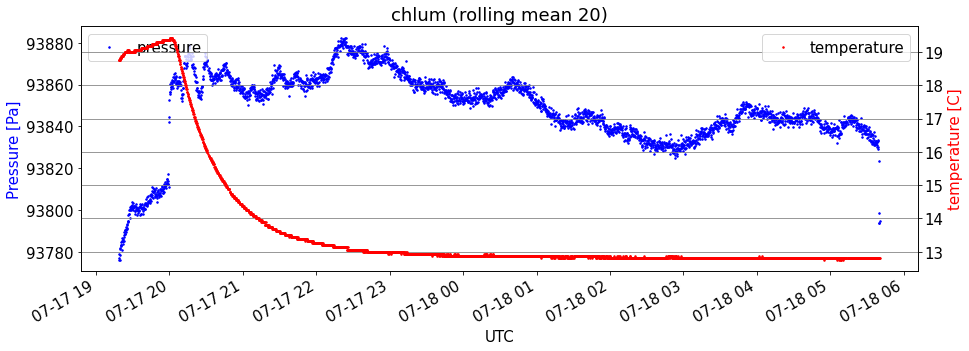

In [15]:
plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})


xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']



xx['pressure'].plot(c='blue', linestyle='', marker='.', ms=3, label = 'pressure')

s = fto.split('/')
plt.title(s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,1.5])
plt.xlabel('UTC')
plt.ylabel(r'Pressure [Pa]', color='blue')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='red', label='temperature', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
plt.ylabel('temperature [C]', color='red')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



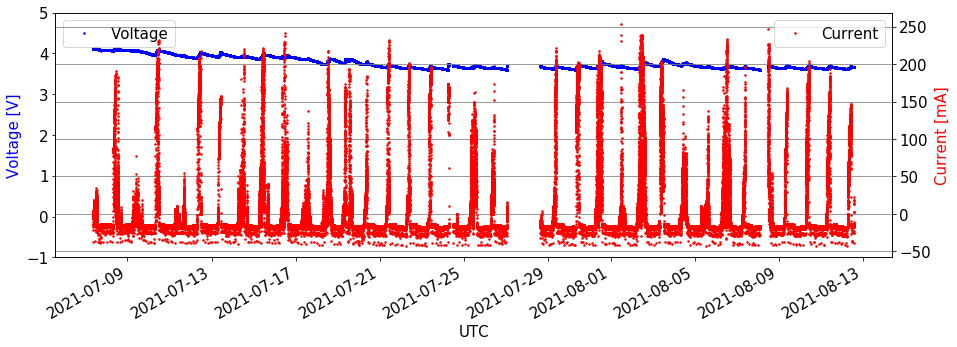

In [28]:
plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})


xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']
#xx = xx.loc['2021-08-15 00:00:00':'2021-08-16 00:00:00']
#xx = xx.loc['2021-08-15 12:00:00':'2021-08-16 18:00:00']



xx['voltage'].plot(c='blue', linestyle='', marker='.', ms=3, label = 'Voltage')

s = fto.split('/')
#plt.title(s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylim([-1,5])
plt.xlabel('UTC')
plt.ylabel(r'Voltage [V]', color='blue')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['current'].plot(c='red', label='Current', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
plt.ylabel('Current [mA]', color='red')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



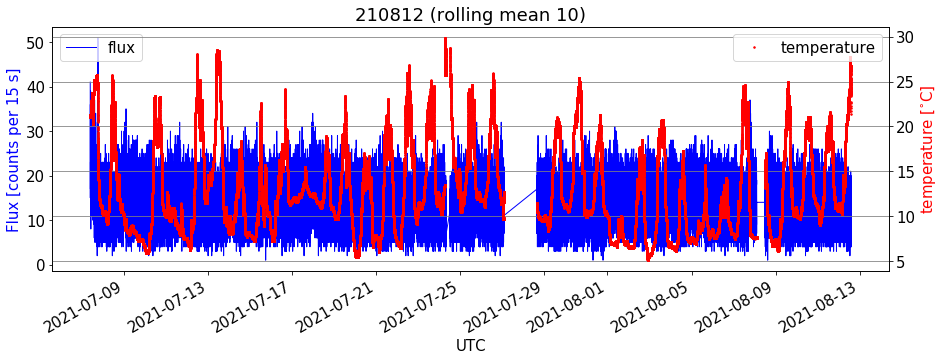

In [22]:
NOISE_LEVEL = 0
LAST_CHANNEL = 240
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})


xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']
#xx = xx.loc['2021-08-15 12:00:00':'2021-08-16 18:00:00']

xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

#xx['flux'].plot(c='gray', marker='.', linewidth=1)
xx['flux'].plot(c='blue', linewidth=1)
#xx['fluxmean'].plot(c='red')
#(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title(s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,1.5])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts per 15 s]', color='blue')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='red', label='temperature', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
plt.ylabel(r'temperature [$^{\circ}$C]', color='red')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



# Blitzortung

In [15]:
lat=49.0640992 # Polednik
lon=13.3950208

#lat=49.05367 # Prvni strom
#lon=13.40039

#start=pd.Timestamp('2021-08-15 12:00') # bourke kdy odesla dobijeci elektronika
#end=pd.Timestamp('2021-08-16 18:00')

start=pd.Timestamp('2021-07-08 00:00') # bourka kdy odesla dobijeci elektronika
end=pd.Timestamp('2021-08-13 00:00')

BLITZ_DIST = 60

print(start, end, lat, lon)
region=1

### url for json data preparation
url=[]

for i in range(0,int(np.ceil((end-start).total_seconds()/600)+1)):
    next=start+ pd.Timedelta(minutes=i*10)
    url.append('http://data.blitzortung.org/Data/Restricted/Strikes_%01d/%02d/%02d/%02d/%02d/%02d.json' % (region, next.year, next.month, next.day, next.hour, np.floor((next.minute)//10)*10))

import requests
blitz=pd.DataFrame()
for i in range(len(url)):
    try:
        html = requests.get(url[i]).content
        blitz_part = pd.read_json(html,lines=True)
        blitz_part.drop(columns=['status','sig','mds','mcg'], inplace=True)#,'region', 
        blitz=blitz.append(blitz_part)
    except:
        print("No data", url[i])
        pass
blitz.set_index(['time'], inplace=True)

### reduction of too distant events
blitz=blitz[(blitz['lat']>(lat-2) )&(blitz['lat']<(lat+2) )]
blitz=blitz[(blitz['lon']>(lon-3.5) )&(blitz['lon']<(lon+3.5) )]

### calculation of distance of events from station
#from math import radians, cos, sin, asin, sqrt, atan2, degrees
try:
    blitz.drop(columns=['alt','pol','region'], inplace=True)
except:
    print('No columns to drop (alt, pol, region)')
    pass
#blitz['time']=blitz.index    
blitz['date'] = pd.to_datetime(blitz.index, unit='ns')
blitz.reset_index(inplace=True)
blitz.set_index('date', inplace=True)

blitz['lonRad']=np.radians(blitz.lon)
blitz['latRad']=np.radians(blitz.lat)
lonRad=np.radians(lon)
latRad=np.radians(lat)
blitz['DlonRad']=lonRad-blitz.lonRad
blitz['DlatRad']=latRad-blitz.latRad
blitz['a']=np.sin(blitz.DlatRad/2.)**2. + np.cos(blitz.latRad) * np.cos(latRad) * np.sin(blitz.DlonRad/2.)**2.
blitz['km'] = 2. * np.arcsin(np.sqrt(blitz.a))*6378.
blitz.drop(columns=['lonRad','latRad','DlonRad','DlatRad','a'], inplace=True)
try:
    blitz.drop(columns=['alt','pol','region'], inplace=True)
except:
    print('No columns to drop (alt, pol, region)')
blitz = blitz.loc[blitz['km'] < BLITZ_DIST]
blitz['date'] = pd.to_datetime(blitz.index, unit='ns')
#blitz.reset_index(inplace=True)
#blitz.set_index('date', inplace=True)

blitz.to_csv(dto + "/blitz.csv")

print('end')

2021-07-08 00:00:00 2021-08-13 00:00:00 49.0640992 13.3950208
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2021/08/11/19/20.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2021/08/11/19/30.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2021/08/11/19/40.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2021/08/11/19/50.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2021/08/11/20/00.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2021/08/11/20/10.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2021/08/11/20/20.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2021/08/11/20/30.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2021/08/11/20/40.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2021/08/11/20/50.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2021/08/11/21/00.json
No data http:/

In [16]:
blitz

,time,lat,lon,km,date
date,,,,,
2021-07-08 00:48:30.829185439,1625705310829185439,48.632866,13.240356,49.322458,2021-07-08 00:48:30.829185439
2021-07-08 00:48:30.831775957,1625705310831775957,48.653590,13.260290,46.749865,2021-07-08 00:48:30.831775957
2021-07-08 00:48:30.831781386,1625705310831781386,48.652350,13.263133,46.841445,2021-07-08 00:48:30.831781386
2021-07-08 00:48:30.831782609,1625705310831782609,48.643393,13.253908,47.958762,2021-07-08 00:48:30.831782609
2021-07-08 11:56:00.228902204,1625745360228902204,48.957762,12.619286,57.863355,2021-07-08 11:56:00.228902204
...,...,...,...,...,...
2021-08-08 14:43:05.345944478,1628433785345944478,49.431200,13.125008,45.330898,2021-08-08 14:43:05.345944478
2021-08-08 14:43:05.345913004,1628433785345913004,49.539735,13.026111,59.332627,2021-08-08 14:43:05.345913004
2021-08-08 14:43:05.345945476,1628433785345945476,49.439992,13.117333,46.453850,2021-08-08 14:43:05.345945476


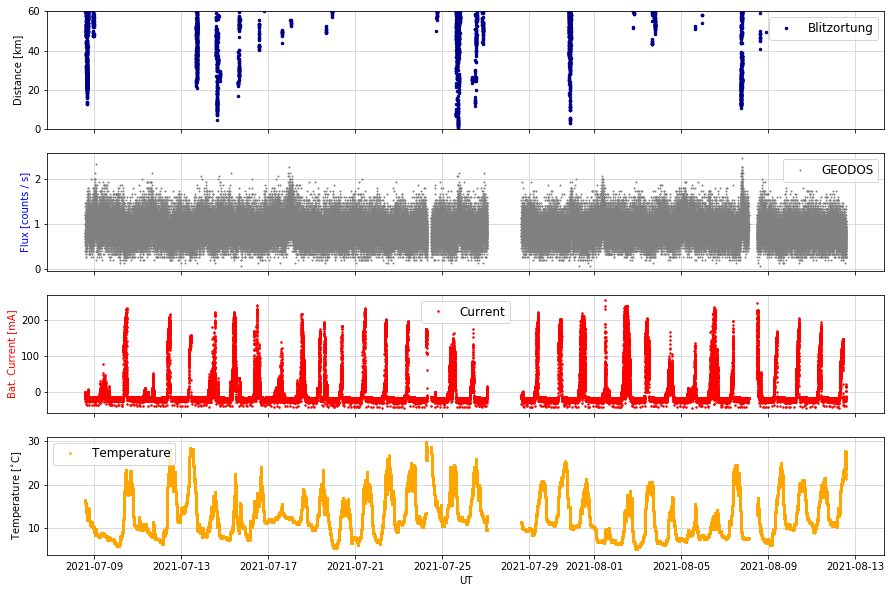

In [30]:
WINDOW = 2

blitz = pd.read_csv(dto + "/blitz.csv")
blitz['date'] = pd.to_datetime(blitz['date'])
blitz.set_index('date', inplace=True)

fig, (ax6, ax3, ax5, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(15,10))
matplotlib.rcParams.update({'font.size': 12})

FROM = '2021-07-08 14:00:00'
TO = '2021-08-16 18:15:00'
#FROM = '2021-08-15 12:00:00'
#TO = '2021-08-16 18:00:00'
#FROM = '2021-08-15 18:00:00'
#TO = '2021-08-15 19:00:00'
#FROM = '2021-08-16 9:00:00'
#TO = '2021-08-16 12:00:00'

xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2021-08-15 12:00:00':'2021-08-16 18:00:00'] # bourka s odpalenou elektronikou
#xx = xx.loc['2021-08-15 18:00:00':'2021-08-15 19:00:00'] # bourka s odpalenou elektronikou
#xx = xx.loc['2021-08-16 9:00:00':'2021-08-16 12:00:00'] # bourka s odpalenou elektronikou
#xx = xx.loc['2021-08-15 18:00:00':'2021-08-16 18:15:00']



xx = xx.loc[FROM:TO]
lightning = blitz.loc[FROM:TO]

xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))
xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

ax3.plot(xx['flux']/15, marker='.', color='gray', label='GEODOS', ms=2, linestyle='none')
#ax3.plot(xx['fluxmean']/15, label='mean')
ax3.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax3.set_ylabel(r'Flux [counts / s]', color='blue')
#ax3.set_yscale('log')
#ax3.set_ylim(.6,2.5)
ax3.legend(loc=1)


ax4.plot(xx['temperature'], c='orange', label='Temperature', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
ax4.set_xlabel('UT')
ax4.set_ylabel(r'Temperature [$^{\circ}$C]')
ax4.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax4.legend()

ax6.plot(lightning.index, lightning.km, ls='', marker='.', ms=5, label='Blitzortung', c='darkblue')
ax6.set_ylabel('Distance [km]')
ax6.legend()
ax6.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax6.set_ylim(0,60)

ax5.plot(xx['current'], c='red', label='Current', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
ax5.set_ylabel('Bat. Current [mA]', color='red')
ax5.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax5.legend()


In [20]:
xx

,0,1,2,3,4,5,6,7,8,9,...,lat,lon,date,UTC,temperature,pressure,voltage,current,flux,fluxmean
UTC,,,,,,,,,,,,,,,,,,,,,
2021-08-15 18:00:06.550,2.0,3,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,...,49.064126,13.395212,1.629049e+18,2021-08-15 18:00:06.550,16.94,86737.50,4.08,-65,12.0,NaN
2021-08-15 18:00:22.420,5.0,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49.064126,13.395212,1.629049e+18,2021-08-15 18:00:22.420,16.88,86747.50,4.08,-65,14.0,13.0
2021-08-15 18:00:38.600,4.0,4,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,49.064126,13.395212,1.629049e+18,2021-08-15 18:00:38.600,16.88,86737.75,4.08,-65,15.0,14.5
2021-08-15 18:00:54.770,2.0,1,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,49.064126,13.395212,1.629049e+18,2021-08-15 18:00:54.770,16.81,86754.75,4.08,-65,10.0,12.5
2021-08-15 18:01:10.960,1.0,3,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,49.064126,13.395212,1.629049e+18,2021-08-15 18:01:10.960,16.81,86747.50,4.08,-65,11.0,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-15 18:58:48.140,3.0,3,2.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,...,49.064126,13.395212,1.629049e+18,2021-08-15 18:58:48.140,15.81,86661.75,-0.26,-257,20.0,16.0
2021-08-15 18:59:04.300,3.0,2,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,...,49.064126,13.395212,1.629049e+18,2021-08-15 18:59:04.300,15.81,86654.75,-0.26,-257,14.0,17.0
2021-08-15 18:59:20.470,3.0,6,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,49.064126,13.395212,1.629049e+18,2021-08-15 18:59:20.470,15.88,86653.00,-0.26,-257,17.0,15.5


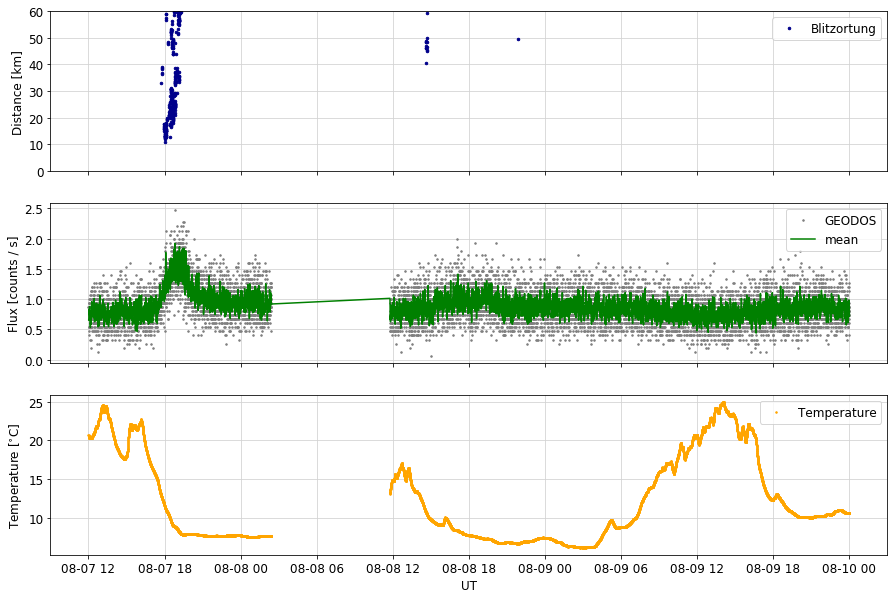

In [72]:
WINDOW = 5

blitz = pd.read_csv(dto + "/blitz.csv")
blitz['date'] = pd.to_datetime(blitz['date'])
blitz.set_index('date', inplace=True)

fig, (ax6, ax3, ax4) = plt.subplots(nrows=3, sharex=True, figsize=(15,10))
matplotlib.rcParams.update({'font.size': 12})

FROM = '2021-07-08 12:00:00'
TO = '2021-08-16 18:15:00'
#FROM = '2021-07-30 12:00:00'
#TO = '2021-08-2 12:00:00'
FROM = '2021-08-7 12:00:00'
TO = '2021-08-10 00:00:00'
#FROM = '2021-07-25 12:00:00'
#TO = '2021-07-26 12:00:00'

xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
xx = xx.loc[FROM:TO]
lightning = blitz.loc[FROM:TO]

xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))
xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

ax3.plot(xx['flux']/15, marker='.', color='gray', label='GEODOS', ms=3, linestyle='none')
ax3.plot(xx['fluxmean']/15, label='mean', color='green')
ax3.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax3.set_ylabel(r'Flux [counts / s]')
#ax3.set_yscale('log')
#ax3.set_ylim(.5,2.2)
ax3.legend()
#ax3.set_xlabel('UT')

ax4.plot(xx['temperature'], c='orange', label='Temperature', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
ax4.set_xlabel('UT')
ax4.set_ylabel(r'Temperature [$^{\circ}$C]')
ax4.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax4.legend()

ax6.plot(lightning.index, lightning.km, ls='', marker='.', ms=5, label='Blitzortung', c='darkblue')
ax6.set_ylabel('Distance [km]')
ax6.legend()
ax6.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax6.set_ylim(0,60)

ax5.plot(xx['current'], c='red', label='Current', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
ax5.set_ylabel('Bat. Current [mA]', color='red')
ax5.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax5.legend()


# Energy Spectrum

/tmp/ipykernel_6138/949728858.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  yy = yy.loc['2021-11-3 00:00:00':'2021-11-3 12:00:00'] # FD 11. 2021
/tmp/ipykernel_6138/949728858.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ener = yy.iloc[:,0:1000].sum()


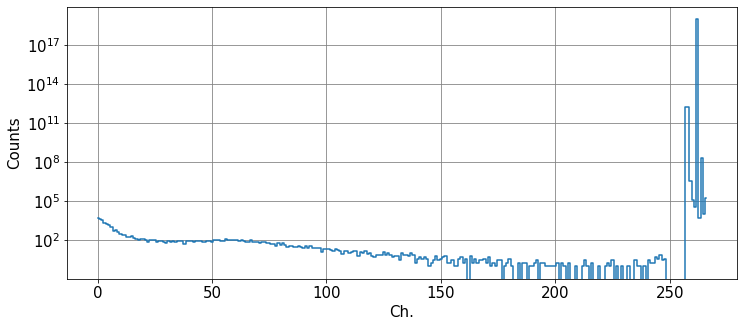

In [17]:
yy = histogram.copy()
yy.set_index('UTC', inplace = True, drop=False)
#yy = yy.loc['2021-08-15 11:00:00':'2021-08-16 18:00:00']
#yy = yy.loc['2021-08-16 10:00:00':'2021-08-16 12:00:00']
#yy = yy.loc['2021-11-4 00:00:00':'2021-11-4 12:00:00'] # FD 11. 2021
yy = yy.loc['2021-11-3 00:00:00':'2021-11-3 12:00:00'] # FD 11. 2021

yy = yy.rename(columns={x:y for x,y in zip(yy.columns[:258],range(0,258))})
ener = yy.iloc[:,0:1000].sum()
ener = ener.reset_index()
plt.figure(figsize=(12,5))
plt.plot(ener[0], drawstyle='steps-mid')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='grey')
#plt.xlim([10,100])

/tmp/ipykernel_6138/1968384001.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  yy = yy.loc['2021-11-4 00:00:00':'2021-11-4 12:00:00'] # FD 11. 2021
/tmp/ipykernel_6138/1968384001.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ener = yy.iloc[:,0:1000].sum()
/tmp/ipykernel_6138/1968384001.py:24: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  yy = yy.loc['2021-11-3 00:00:00':'2021-11-3 12:00:00'] # FD 11. 2021
/tmp/ipykernel_6138/1968384001.py:27: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will r

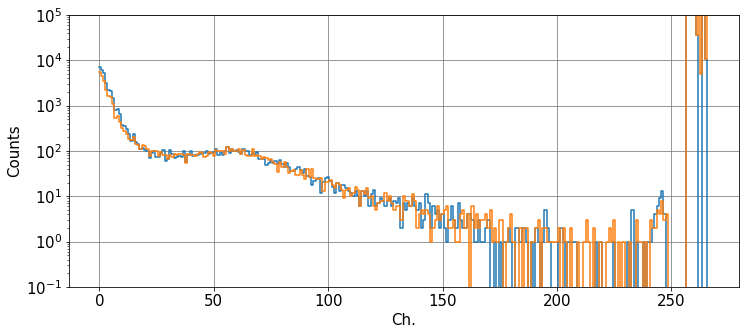

In [21]:
yy = histogram.copy()
yy.set_index('UTC', inplace = True, drop=False)
#yy = yy.loc['2021-08-15 11:00:00':'2021-08-16 18:00:00']
#yy = yy.loc['2021-08-16 10:00:00':'2021-08-16 12:00:00']
yy = yy.loc['2021-11-4 00:00:00':'2021-11-4 12:00:00'] # FD 11. 2021

yy = yy.rename(columns={x:y for x,y in zip(yy.columns[:258],range(0,258))})
ener = yy.iloc[:,0:1000].sum()
ener = ener.reset_index()
plt.figure(figsize=(12,5))
plt.plot(ener[0], drawstyle='steps-mid')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='grey')
plt.ylim([0.1,1e5])

yy = histogram.copy()
yy.set_index('UTC', inplace = True, drop=False)
#yy = yy.loc['2021-08-15 11:00:00':'2021-08-16 18:00:00']
#yy = yy.loc['2021-08-16 10:00:00':'2021-08-16 12:00:00']
#yy = yy.loc['2021-11-4 00:00:00':'2021-11-4 12:00:00'] # FD 11. 2021
yy = yy.loc['2021-11-3 00:00:00':'2021-11-3 12:00:00'] # FD 11. 2021

yy = yy.rename(columns={x:y for x,y in zip(yy.columns[:258],range(0,258))})
ener = yy.iloc[:,0:1000].sum()
ener = ener.reset_index()
#plt.figure(figsize=(12,5))
plt.plot(ener[0], drawstyle='steps-mid')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='grey')
#plt.xlim([10,100])

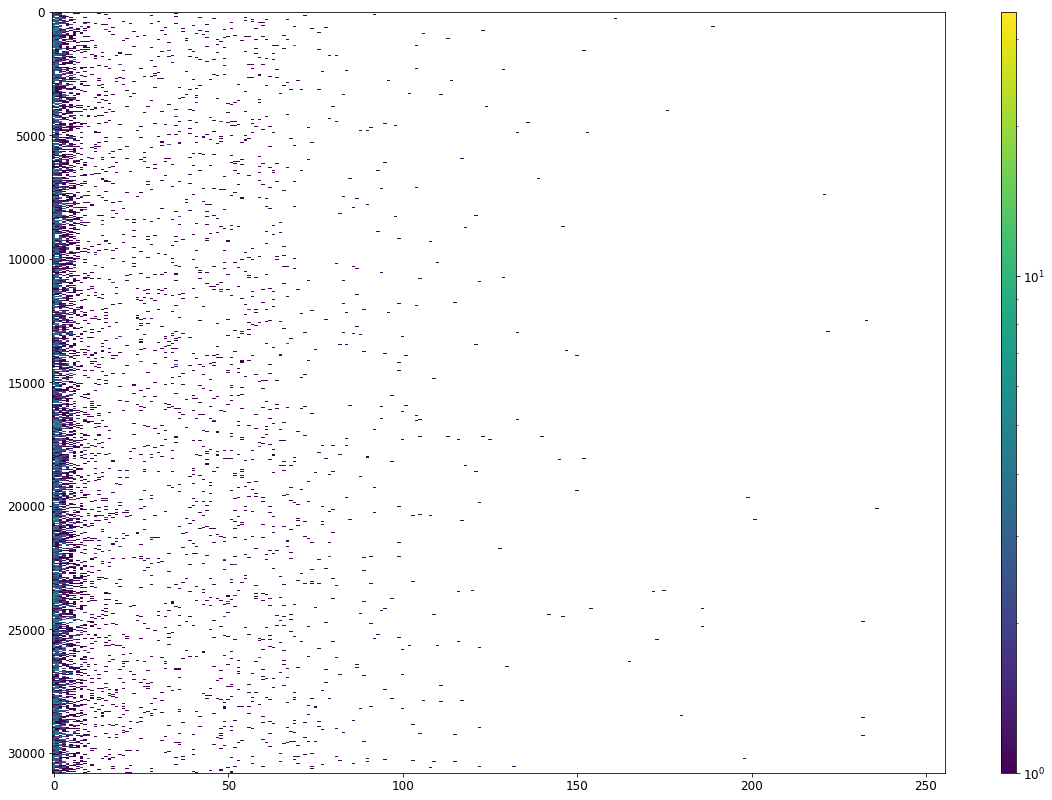

In [33]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(20, 14))
plt.imshow((histogram.iloc[:,0:256]), aspect='auto', norm=LogNorm())
plt.colorbar(aspect=50)
None